<h1 style="text-align: left;"><strong><span style="text-decoration: underline;">Loading the libraries</span></strong></h1>
<p>it will load the basic libraries which are required for the working of the kernel. Make sure to use tensor flow with GPU if your graphics card is supported.</p>

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf

c:\users\mayan\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<h1 style="text-align: left;"><u>Load the data</u></h1>
<p>Load the test &amp; the train data downloaded from <a href="https://www.kaggle.com/c/digit-recognizer/data" target="_blank" rel="noopener">kaggle</a></p>

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print ( "The shape of test data is " + str (test.shape))
test.head()


The shape of test data is (28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:

print ( "The shape of train is "+   str(train.shape) )
train.head()


The shape of train is (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h1 style="text-align: left;"><u>Separate the image &amp; labels</u></h1>
Thus here we can see that out image has 42000 IMAGES with 784 pixels. The first column is for the label. After that pixel are numbered from 0 to 784.

In [5]:
labels = train["label"]

# Drop 'label' column
images = train.drop(labels = ["label"],axis = 1)

# free some space
del train 

<h1 style="text-align: left;"><u>Visualize the labels</u></h1>

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

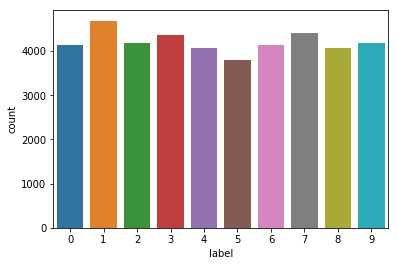

In [6]:
g = sns.countplot(labels)

labels.value_counts()

<h2 id="2.2-Check-for-null-and-missing-values">Check for null and missing values</h2>

In [7]:
# Check the data
images.isnull().any().describe()


count       784
unique        1
top       False
freq        784
dtype: object

In [8]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

<h2 id="2.2-Check-for-null-and-missing-values">NORMALIZATION&nbsp;</h2>

We perform a grayscale normalization to reduce the effect of illumination's differences.

Moreover the CNN converg faster on [0..1] data than on [0..255]

In [9]:
images = images / 255.0
test = test / 255.0

<h1 id="Viewing-an-Image">Viewing an Image</h1>
<p>Since the image is currently one-dimension, we load it into a numpy array and reshape it so that it is two-dimensional (28x28 pixels) Then, we plot the image and label with matplotlib</p>

Text(0.5,1,'0.0')

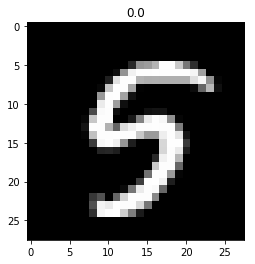

In [10]:
i=8
img=images.iloc[i].as_matrix()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(images.iloc[i,0])

<h1> One hot Encoding the labels </h1>
convert class labels from scalars to one-hot vectors
 
0 => [1 0 0 0 0 0 0 0 0 0]

1 => [0 1 0 0 0 0 0 0 0 0]

9 => [0 0 0 0 0 0 0 0 0 1] 

In [11]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

labels_hot = to_categorical(labels, num_classes = 10)


Using TensorFlow backend.


In [12]:
#labels_raw = np.array([label.argmax() for label in labels])

### Defining the constant values

In [13]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of classes, one class for each of 10 digits.
num_classes = 10

# TENSOR FLOW IMPLEMENTATION OF NN


### Defining the placeholders

In [37]:
x = tf.placeholder(tf.float32, [None, img_size_flat])
y_true = tf.placeholder(tf.float32, [None, num_classes])
y_true_cls = tf.placeholder(tf.int64, [None])

### variables to be optimized

In [38]:
weights = tf.Variable(tf.truncated_normal(([img_size_flat, num_classes]), stddev=0.1)) # not defining as 0 to breaksymmetry but small +ve
biases = tf.Variable(tf.zeros([num_classes]))

## Model

In [39]:
logits = tf.matmul(x, weights) + biases

y_pred = tf.nn.softmax(logits)

y_pred_cls = tf.argmax(y_pred, axis=1)

## Cost-function to be optimized

In [40]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                        labels=y_true)
cost = tf.reduce_mean(cross_entropy)

## Performance measures

In [41]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Running the Tensor Flow

In [42]:
session = tf.Session() #create tensor flow session

session.run(tf.global_variables_initializer())

In [47]:
batch_size = 100
def optimize(num_iterations):
    for i in range(num_iterations):
        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = images(batch_size)
        
        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        # Note that the placeholder for y_true_cls is not set
        # because it is not used during training.
        feed_dict_train = {x: images,
                           y_true: labels_hot}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)

In [48]:
feed_dict_test = {x: images,
                  y_true: labels_hot,
                  y_true_cls: labels}

def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    
    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))

In [45]:
print_accuracy()

Accuracy on test-set: 7.1%


In [49]:
optimize(num_iterations=1000)

TypeError: 'DataFrame' object is not callable